In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Para importar el csv

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/staticData.csv', names=['x1', 'y1','z1','x2', 'y2','z2','x1_rotacion','y1_rotacion','z1_rotacion','x2_rotacion','y2_rotacion','z2_rotacion', 'direccion','porcentaje'])

Mounted at /content/drive


In [ ]:
df

,x1,y1,z1,x2,y2,z2,x1_rotacion,y1_rotacion,z1_rotacion,x2_rotacion,y2_rotacion,z2_rotacion,direccion,porcentaje
0,0.318429,-0.126893,3.979163,-0.837971,1.922544,9.732430,4.572977,-1.820686,85.076471,-4.828231,11.134181,77.839357,0,0.100000
1,0.246603,-3.969586,1.450886,-1.312023,-1.738190,9.955091,3.339297,-69.658119,20.041836,-7.397332,-9.820932,77.660363,0,74.407334
2,0.421379,-0.371101,4.027047,-1.067814,-2.600103,9.974244,5.948517,-5.236632,82.062367,-5.914463,-14.531304,74.261698,0,0.000000
3,-0.359130,2.140416,3.201048,-0.694318,-1.513135,10.041282,-5.328164,33.603732,55.862420,-3.911479,-8.549397,80.586083,0,-58.138280
4,0.258574,-0.545878,4.103662,-0.569820,-1.798045,10.101137,3.574069,-7.562302,81.626695,-3.178853,-10.077484,79.423017,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.155623,-3.579331,2.152387,7.551312,-1.611298,7.589619,2.133870,-58.913908,30.996195,44.223645,-8.558787,44.507214,-1,68.634983
1019,-0.031125,-0.090980,4.891354,-1.053449,0.004788,10.074801,-0.364516,-1.065563,88.873800,-5.969311,0.027084,84.030627,0,0.000000
1020,0.203507,2.449268,3.191471,8.789114,-2.267309,7.929596,2.895902,37.448011,52.400620,46.821324,-10.842867,41.140674,-1,-69.726869
1021,-0.045490,2.980781,2.806004,6.880936,-0.639252,7.577648,-0.636647,46.726206,43.266707,42.140145,-3.573687,47.636215,0,0.000000


In [ ]:
# pasamos a números la variable objetivo con el LabelEncoder:
label_encoder = LabelEncoder()
df['direccion'] = label_encoder.fit_transform(df['direccion'])

In [ ]:
X = df[['x1', 'y1','z1','x2', 'y2','z2','x1_rotacion','y1_rotacion','z1_rotacion','x2_rotacion','y2_rotacion','z2_rotacion']].values

y_direccion = df['direccion'].values
y_porcentaje = df['porcentaje'].values

In [ ]:
X_train, X_test, y_train_direccion, y_test_direccion, y_train_porcentaje, y_test_porcentaje = train_test_split(X, y_direccion, y_porcentaje, test_size=0.2, random_state=42)

input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
dense_layer = tf.keras.layers.Dense(8, activation='relu')(input_layer)

# Output 1: Classification for 'direccion'
output_direccion = tf.keras.layers.Dense(3, activation='softmax', name='direccion_output')(dense_layer)

# Output 2: Regression for 'porcentaje'
output_porcentaje = tf.keras.layers.Dense(1, activation='linear', name='porcentaje_output')(dense_layer)

# Combine into a model
model = tf.keras.Model(inputs=input_layer, outputs=[output_direccion, output_porcentaje])


model.compile(
    optimizer='adam',
    loss={
        'direccion_output': tf.keras.losses.SparseCategoricalCrossentropy(),
        'porcentaje_output': tf.keras.losses.MeanSquaredError()
    },
    metrics={
        'direccion_output': 'accuracy',
        'porcentaje_output': 'mae'
    }
)


In [ ]:
history = model.fit(
    X_train,
    {'direccion_output': y_train_direccion, 'porcentaje_output': y_train_porcentaje},
    epochs=100,
    batch_size=2,
    validation_data=(X_test, {'direccion_output': y_test_direccion, 'porcentaje_output': y_test_porcentaje})
)

Epoch 1/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - direccion_output_accuracy: 0.2585 - direccion_output_loss: 18.1113 - loss: 4930.5186 - porcentaje_output_loss: 4912.4077 - porcentaje_output_mse: 4912.4077 - val_direccion_output_accuracy: 0.6683 - val_direccion_output_loss: 6.3945 - val_loss: 2021.4894 - val_porcentaje_output_loss: 2005.4979 - val_porcentaje_output_mse: 2015.0640
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - direccion_output_accuracy: 0.6886 - direccion_output_loss: 5.6975 - loss: 1473.1796 - porcentaje_output_loss: 1467.4827 - porcentaje_output_mse: 1467.4827 - val_direccion_output_accuracy: 0.7024 - val_direccion_output_loss: 5.0707 - val_loss: 742.4767 - val_porcentaje_output_loss: 733.9366 - val_porcentaje_output_mse: 737.3817
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - direccion_output_accuracy: 0.7338 - direccion_output_loss: 4.0051 - loss: 590.8185 - porcentaje_output_loss: 586.8133 - porcentaje_output_mse: 586.8133 - val_direccion_outpu

In [ ]:
eval_results = model.evaluate(X_test, {'direccion_output': y_test_direccion, 'porcentaje_output': y_test_porcentaje})

print("Test Loss (Total):", eval_results[0])
print("Test Accuracy (direccion):", eval_results[1])
print("Test Regression Loss (porcentaje):", eval_results[2])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - direccion_output_accuracy: 0.9530 - direccion_output_loss: 0.2569 - loss: 392.8496 - porcentaje_output_loss: 389.0547 - porcentaje_output_mse: 392.5884 
Test Loss (Total): 332.43109130859375
Test Accuracy (direccion): 0.23609578609466553
Test Regression Loss (porcentaje): 318.0428771972656


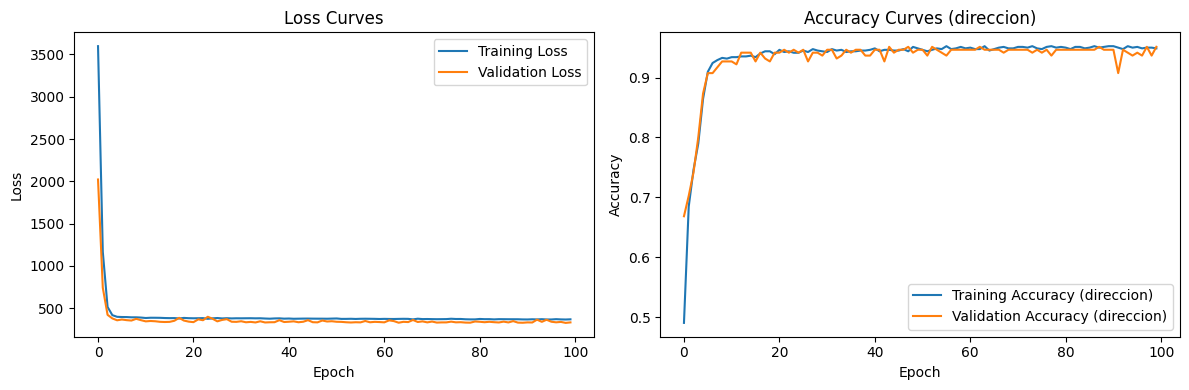

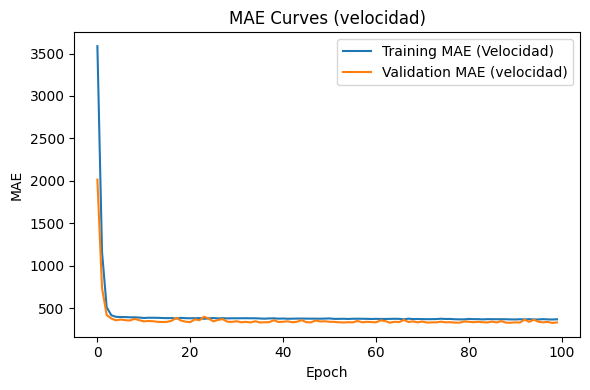

In [ ]:
import matplotlib.pyplot as plt

# Extracting loss and metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['direccion_output_accuracy']
val_acc = history.history['val_direccion_output_accuracy']
train_mse = history.history['porcentaje_output_mse']
val_mse = history.history['val_porcentaje_output_mse']

# Plotting the loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy (direccion)')
plt.plot(val_acc, label='Validation Accuracy (direccion)')
plt.title('Accuracy Curves (direccion)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the MSE curves
plt.figure(figsize=(6, 4))
plt.plot(train_mse, label='Training MAE (Velocidad)')
plt.plot(val_mse, label='Validation MAE (velocidad)')
plt.title('MAE Curves (velocidad)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf

# Guardar el modelo en formato nativo de Keras
model.save('model.keras')

# Cargar el modelo y convertirlo a TensorFlow Lite
model = tf.keras.models.load_model('model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo optimizado
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpyc6g1awa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_1')
Output Type:
  List[TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  140555675626032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140555675197936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140555675192656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140555673752448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140555675310688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140555675194064: TensorSpec(shape=(), dtype=tf.resource, name=None)
